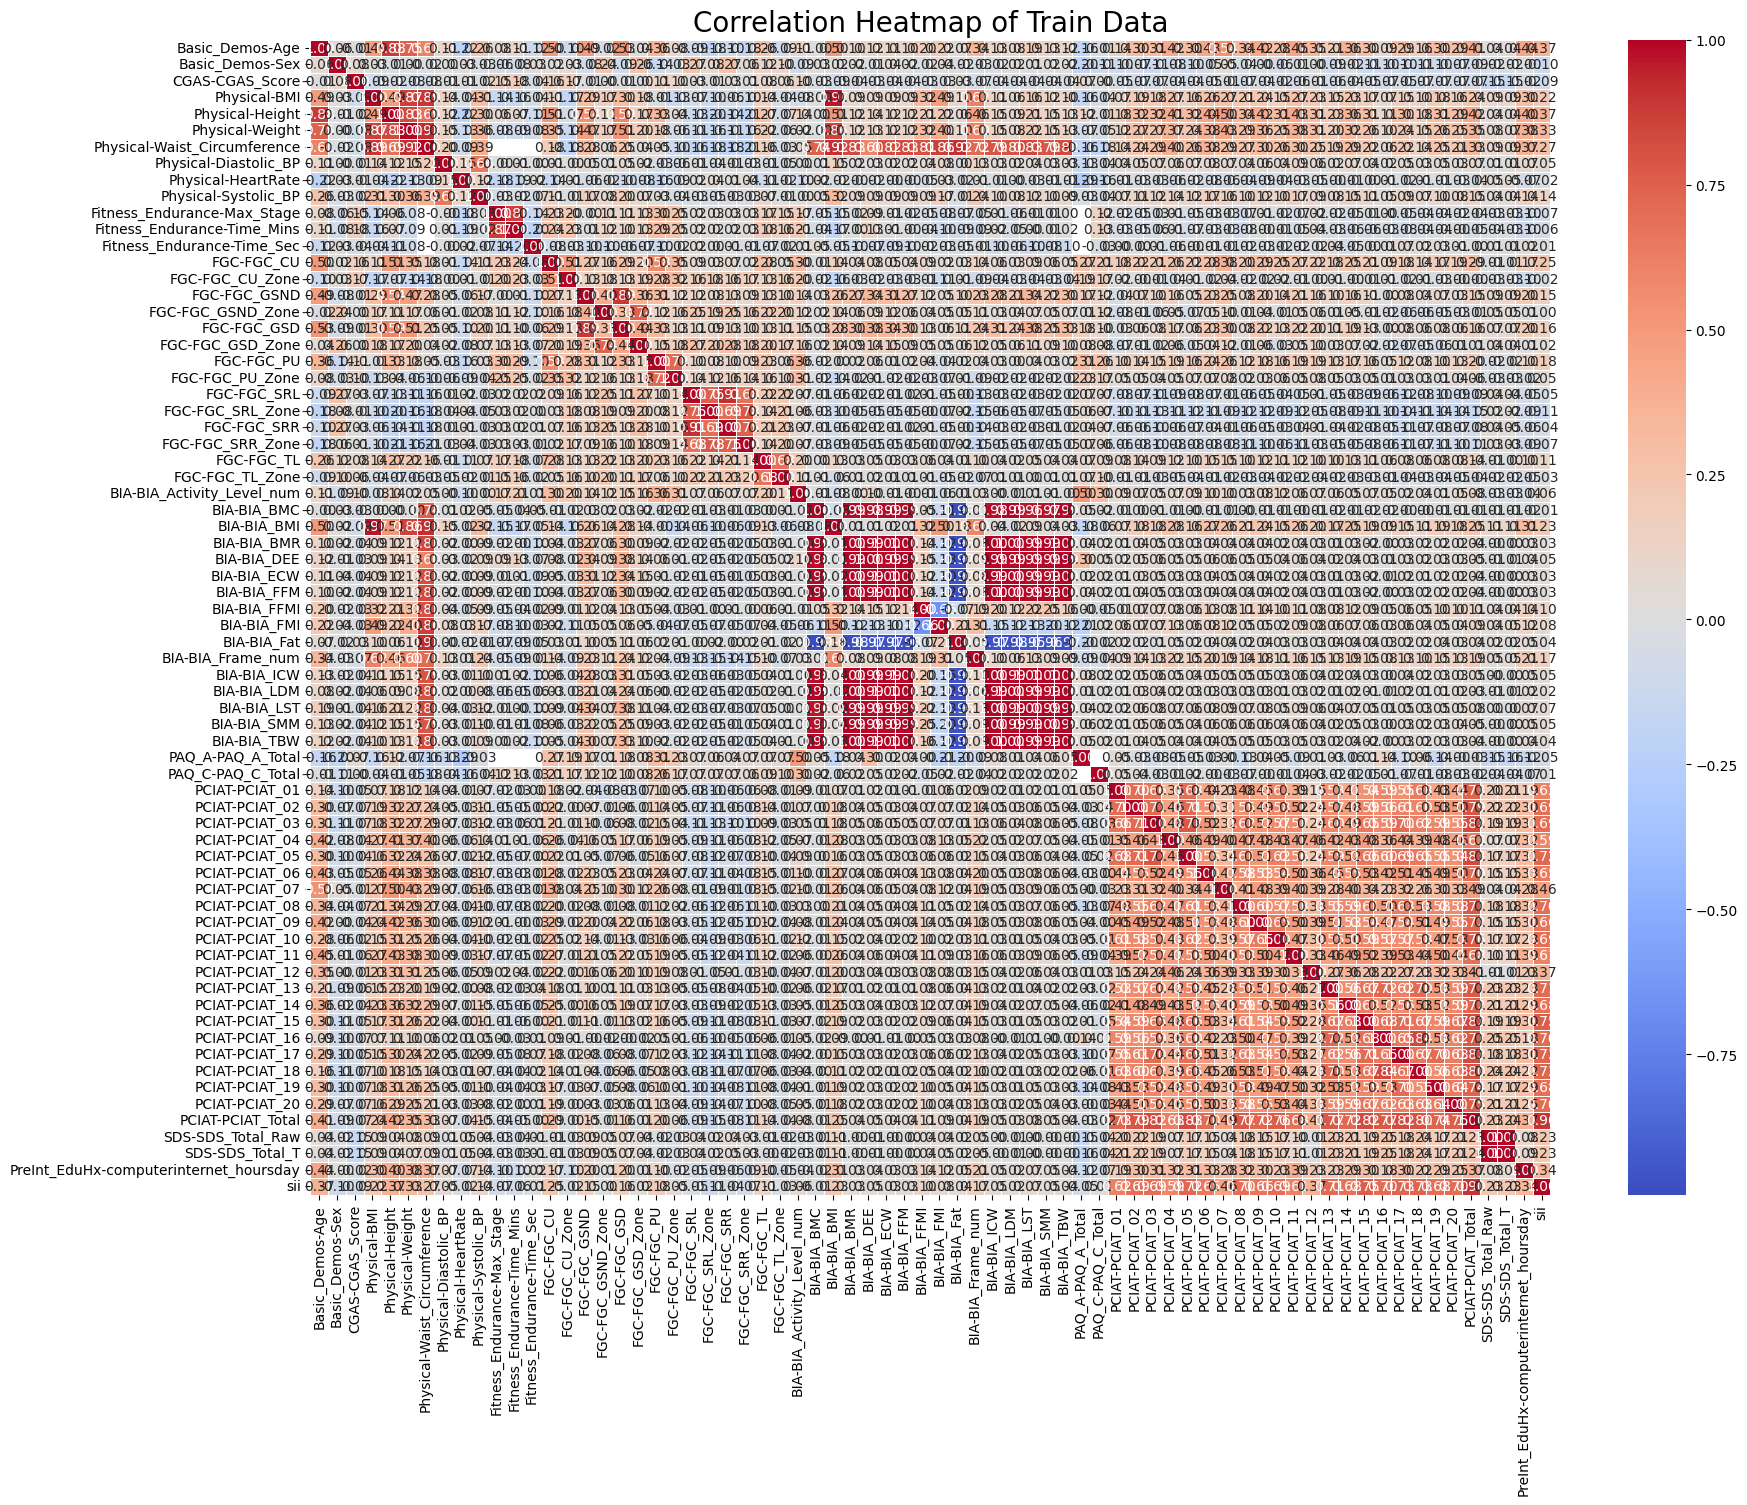

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
from openpyxl.styles import PatternFill

train = pd.read_csv('train.csv')

# exclude object (string) columns
train_copy = train.select_dtypes(exclude=['object'])
# Calculate the correlation matrix
correlation_matrix = train_copy.corr()

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Train Data', fontsize=20)
plt.show()

# Export the correlation matrix to a CSV file
# Create a new workbook and select the active worksheet
wb = openpyxl.Workbook()
ws = wb.active

def get_color(value):
    red = 220 + int(35 * value)
    green = 220 - int(100 * abs(value))
    blue = 200 - int(55 * value)
    return f"{red:02x}{green:02x}{blue:02x}"

# Apply the color to each cell based on its value
for r_idx, row in enumerate(correlation_matrix.itertuples(), 1):
    for c_idx, value in enumerate(row[1:], 1):
        cell = ws.cell(row=r_idx + 1, column=c_idx + 1, value=value)
        try:
            color = get_color(value)
        except:
            color = "FFFFFF"
        cell.fill = PatternFill(start_color=color, end_color=color, fill_type="solid")
# Write the column and index names
for c_idx, col_name in enumerate(correlation_matrix.columns, 1):
    ws.cell(row=1, column=c_idx + 1, value=col_name)
for r_idx, idx_name in enumerate(correlation_matrix.index, 1):
    ws.cell(row=r_idx + 1, column=1, value=idx_name)

# Round the values to 2 decimal places
for row in ws.iter_rows(min_row=2, min_col=2, max_row=ws.max_row, max_col=ws.max_column):
    for cell in row:
        cell.value = round(cell.value, 2)
# Save the workbook
wb.save('correlation_matrix_colored.xlsx')